In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [35]:
bike_sharing_data = pd.read_csv('datasets/day.csv')

bike_sharing_data.shape

(731, 16)

In [36]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [62]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [63]:
bike_sharing_data.to_csv('datasets/bike_sharing_data_processed.csv', index=False)

In [64]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [65]:
bike_sharing_data['season'].unique()
#In season  1 for Spring 2 for Fall 4 for Winter

array([1, 2, 3, 4], dtype=int64)

In [66]:
bike_sharing_data['workingday'].unique()


array([0, 1], dtype=int64)

In [67]:
bike_sharing_data['holiday'].unique()
# 0 represents No holiday 1 represents Holiday

array([0, 1], dtype=int64)

In [68]:
bike_sharing_data['weathersit'].unique()
# 1 for cloud , few clouds 2 for misty,cloudy day 3 for Light  snow,rain thunderstorm

array([2, 1, 3], dtype=int64)

In [69]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [70]:
bike_sharing_data.shape

(731, 7)

In [71]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


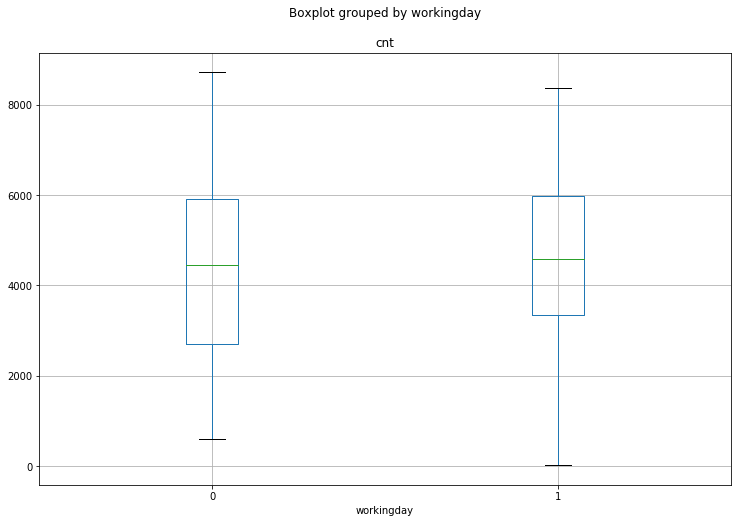

In [72]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(12, 8))

In [73]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]

sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [74]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [75]:
sample_01 = sample_01.sample(231)

sample_01.shape, sample_02.shape

((231, 7), (231, 7))

In [76]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=1.541841299358837, pvalue=0.2149766872769677)

(array([ 4., 14., 24., 28., 35., 39., 38., 30.,  9., 10.]),
 array([-2.4556856 , -1.9813587 , -1.5070318 , -1.03270491, -0.55837801,
        -0.08405111,  0.39027578,  0.86460268,  1.33892958,  1.81325647,
         2.28758337]),
 <a list of 10 Patch objects>)

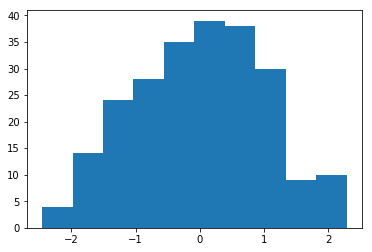

In [77]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=np.float))

plt.hist(diff)

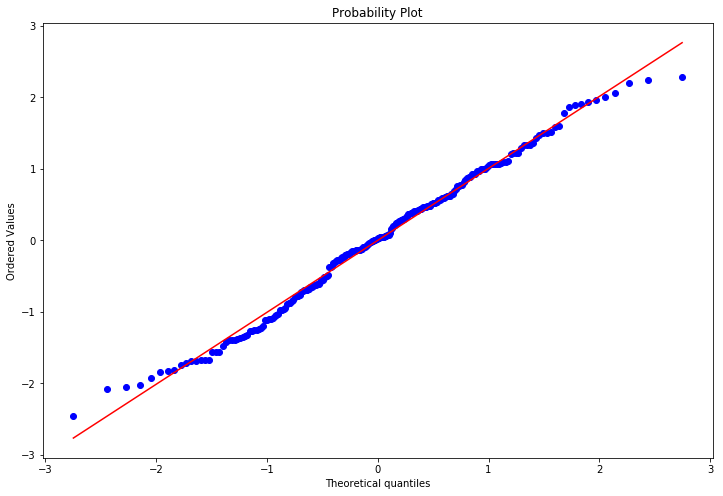

In [78]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

In [79]:
stats.shapiro(diff)

(0.9906585812568665, 0.14435939490795135)

In [80]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.3224354718348306, pvalue=0.1866803050177102)

In [81]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [82]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4574.363636,1914.487614,125.964037,4326.172692,4822.554581
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4452.266234,1986.119452,92.402640,4270.683662,4633.848806


In [83]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   244.1948
1      Degrees of freedom =   460.0000
2                       t =     1.3224
3   Two side test p value =     0.1867
4  Difference < 0 p value =     0.9067
5  Difference > 0 p value =     0.0933
6               Cohen's d =     0.1231
7               Hedge's g =     0.1228
8           Glass's delta =     0.1276
9                       r =     0.0615


In [84]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


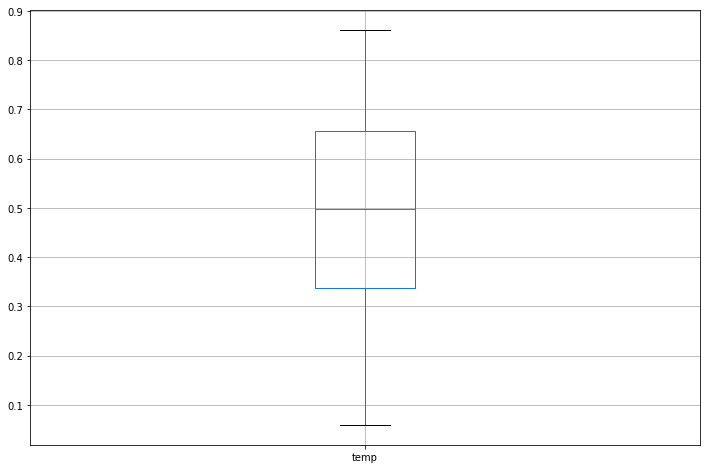

In [87]:
bike_sharing_data[['temp']].boxplot(figsize=(12, 8))

In [88]:
bike_sharing_data['temp_category'] = \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [89]:
 bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
212,3,8,0,1,1,0.771667,4266,True
556,3,7,0,1,2,0.720833,6290,True
297,4,10,0,1,1,0.471667,4687,False
200,3,7,0,1,1,0.768333,4332,True
332,4,11,0,1,2,0.458333,2914,False
347,4,12,0,1,2,0.317500,3740,False
526,2,6,0,0,1,0.726667,6598,True
499,2,5,0,1,2,0.573333,2843,True
605,3,8,0,1,1,0.728333,7040,True
189,3,7,0,0,1,0.733333,5336,True


In [92]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


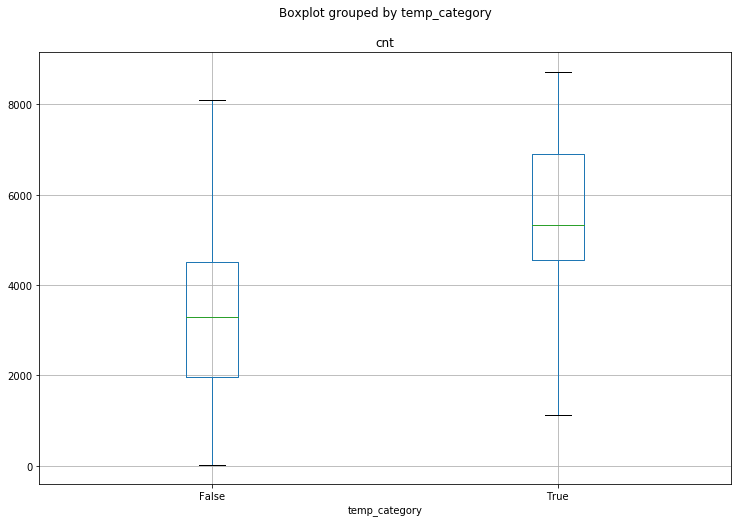

In [93]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

In [94]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]

sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [95]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [98]:
sample_01 = sample_01.sample(364)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [99]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.510116198006232, pvalue=0.03403248890375686)

C:\Users\DHRUV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(array([ 3.,  5., 10., 45., 69., 67., 75., 45., 35., 10.]),
 array([-3.16087934, -2.6100825 , -2.05928566, -1.50848881, -0.95769197,
        -0.40689513,  0.14390171,  0.69469855,  1.24549539,  1.79629224,
         2.34708908]),
 <a list of 10 Patch objects>)

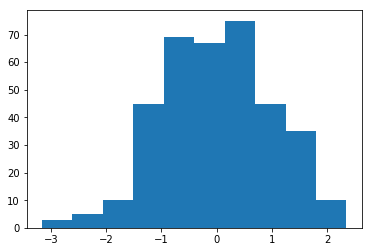

In [100]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))
plt.hist(diff)

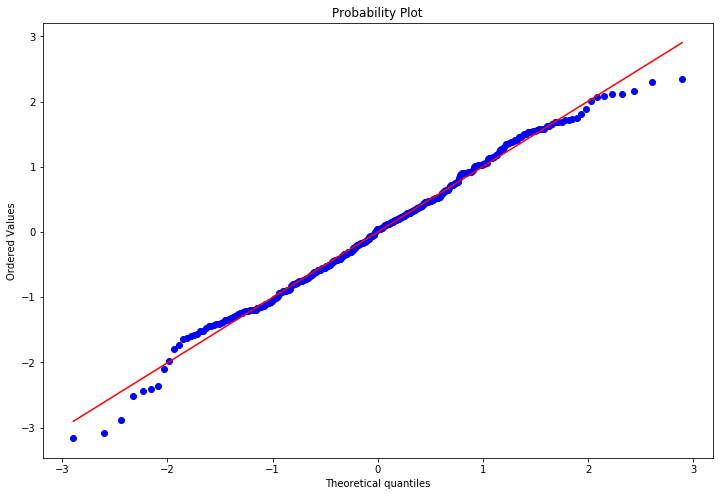

In [101]:
plt.figure(figsize=(12, 8))
stats.probplot(diff, plot=plt)
plt.show()

In [102]:
stats.shapiro(diff)

(0.9929196238517761, 0.08357754349708557)

In [103]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.922170673060837, pvalue=3.2209099228179047e-65)

In [104]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [105]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5615.576923,1478.331931,77.485647,5463.199798,5767.954048
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4501.620879,1939.634713,71.887645,4360.488723,4642.753036


In [106]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2227.9121
1      Degrees of freedom =    713.2315
2                       t =     18.9222
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.4026
7               Hedge's g =      1.4012
8           Glass's delta =      1.5070
9                       r =      0.5781
